In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow import keras
import pickle
import cv2
#from google.colab.patches import cv2_imshow
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# check GPU is available
print("GPUs Available: ", tf.config.list_physical_devices('GPU'))

# set random seed to be used all over
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
#os.environ['TF_DETERMINISTIC_OPS'] = '1' #deterministic behavior in TensorFlow operations.
tf.keras.utils.set_random_seed(SEED)
tf.compat.v1.set_random_seed(SEED)
config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1,log_device_placement =True)
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = config)

GPUs Available:  []

Device mapping: no known devices.


In [2]:
# Path to the directory containing the your project info (Change to your location)
PROJECT_ROOT_DIR = ''

# Path to the directory containing the dataset
# DOWNLOAD BUSI dataset here: https://scholar.cu.edu.eg/?q=afahmy/pages/dataset
DATA_DIR = './Dataset_BUSI/Dataset_BUSI_with_GT/'

In [3]:
# Funciton for loading the dataset
# reference: https://www.pyimagesearch.com/2018/09/10/keras-tutorial-how-to-get-started-with-keras-deep-learning-and-python/

def load_image():
  # initialize the data and labels for each class
  data = []
  labels = []

  data_aside = []
  labels_aside = []

  benign_data = []
  benign_labels = []

  malignant_data = []
  malignant_labels = []

  normal_data = []
  normal_labels = []

  # load benign image
  for i in range(1,438):
    image = cv2.imread(PROJECT_ROOT_DIR + DATA_DIR + 'benign/' + 'benign (' + str(i) + ').png')
    # resize image to 224 * 224 * 3
    image = cv2.resize(image, (224, 224))
    benign_data.append(image)
    # extract the class label from the image folder
    benign_labels.append('benign')

  for i in range(0,437):
      data.append(benign_data[i])
      labels.append(benign_labels[i])

  # load malignant image
  for i in range(1,211):
    image = cv2.imread(PROJECT_ROOT_DIR + DATA_DIR + 'malignant/' + 'malignant (' + str(i) + ').png')
    # resize image to 224 * 224 * 3
    image = cv2.resize(image, (224, 224))
    malignant_data.append(image)
    # extract the class label from the image folder
    malignant_labels.append('malignant')

  for i in range(0,210):
      data.append(malignant_data[i])
      labels.append(malignant_labels[i])

  # load normal image
  for i in range(1,134):
    image = cv2.imread(PROJECT_ROOT_DIR + DATA_DIR + 'normal/' + 'normal (' + str(i) + ').png')
    # resize image to 224 * 224 * 3
    image = cv2.resize(image, (224, 224))
    normal_data.append(image)
    # extract the class label from the image folder
    normal_labels.append('normal')

  for i in range(0,133):
      data.append(normal_data[i])
      labels.append(normal_labels[i])

  return data, labels
# Function for image preprocessing
def preprocess(data,labels):
  # Save training and test image to numpy, Scale image features to be in [0, 1]
  data = np.array(data, dtype = np.float32) / 255.0
  # Save labels to numpy encode label to integer catergory 0 = 'benign', 1 = 'malignant', 2 = 'normal'
  labels = np.array(labels)
  new_label_encoder = preprocessing.LabelEncoder()
  new_label_encoder.fit(labels)
  targets = new_label_encoder.transform(labels)

  return data, targets

In [4]:
# Load the BUSI images and labels
# This will take time (my time was around 12 min)
data, labels = load_image()
data, labels = preprocess(data,labels)

# split data into 80% train and 20% test, shuffle the data with
(imgs_train, imgs_test, labels_train, labels_test) = train_test_split(data, labels, test_size = 0.2, random_state=SEED, shuffle = True)
# split data into 60% train data and 20% validation data
(imgs_train, imgs_val, labels_train, labels_val) = train_test_split(imgs_train, labels_train, test_size = 0.2, random_state=SEED, shuffle = True)

In [7]:
# Display the shapes of train, validation, and test datasets
print('Images train shape: {} - Labels train shape: {}'.format(imgs_train.shape, labels_train.shape))
print('Images validation shape: {} - Labels validation shape: {}'.format(imgs_val.shape, labels_val.shape))
print('Images test shape: {} - Labels test shape: {}'.format(imgs_test.shape, labels_test.shape))


Images train shape: (499, 224, 224, 3) - Labels train shape: (499,)
Images validation shape: (125, 224, 224, 3) - Labels validation shape: (125,)
Images test shape: (156, 224, 224, 3) - Labels test shape: (156,)


In [7]:
NUM_LABELS = 3                             # Number of labels
BATCH_SIZE = 16                             # Size of batch
HEIGHT = 224                                 # Height of input image
WIDTH = 224                                  # Width of input image
N_CHANNEL = 3                               # Number of channels
OUTPUT_DIM = 3                             # Number of output dimension

# Set training hyperparameters
NUM_EPOCH = 25                            # Number of epoch to train
LR = 0.0001                                 # Learning rate

INPUT_SHAPE = (HEIGHT, WIDTH, N_CHANNEL)  # Input shape of model
IMG_SHAPE = (HEIGHT, WIDTH, N_CHANNEL)

In [8]:
from tensorflow import keras
labels_train = keras.utils.to_categorical(labels_train, NUM_LABELS)
labels_test = keras.utils.to_categorical(labels_test, NUM_LABELS)
labels_val = keras.utils.to_categorical(labels_val, NUM_LABELS)

Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 218s 7s/step - accuracy: 0.4761 - loss: 1.6516 - val_accuracy: 0.5513 - val_loss: 1.3740
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 215s 7s/step - accuracy: 0.6073 - loss: 1.2160 - val_accuracy: 0.5769 - val_loss: 1.1209
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 216s 7s/step - accuracy: 0.6684 - loss: 1.0595 - val_accuracy: 0.6154 - val_loss: 0.9553
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 215s 7s/step - accuracy: 0.6788 - loss: 0.8918 - val_accuracy: 0.6218 - val_loss: 0.9757
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 219s 7s/step - accuracy: 0.7106 - loss: 0.8470 - val_accuracy: 0.6795 - val_loss: 0.8110
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 237s 7s/step - accuracy: 0.7534 - loss: 0.7329 - val_accuracy: 0.7500 - val_loss: 0.7553
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 218s 7s/step - accuracy: 0.7840 - loss: 0.6795 - val_accuracy: 0.7628 - val_loss: 0.7340
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 218s 7s/step - accuracy: 0.8032 - loss: 0.6281 - val_accuracy: 0.7564 - v

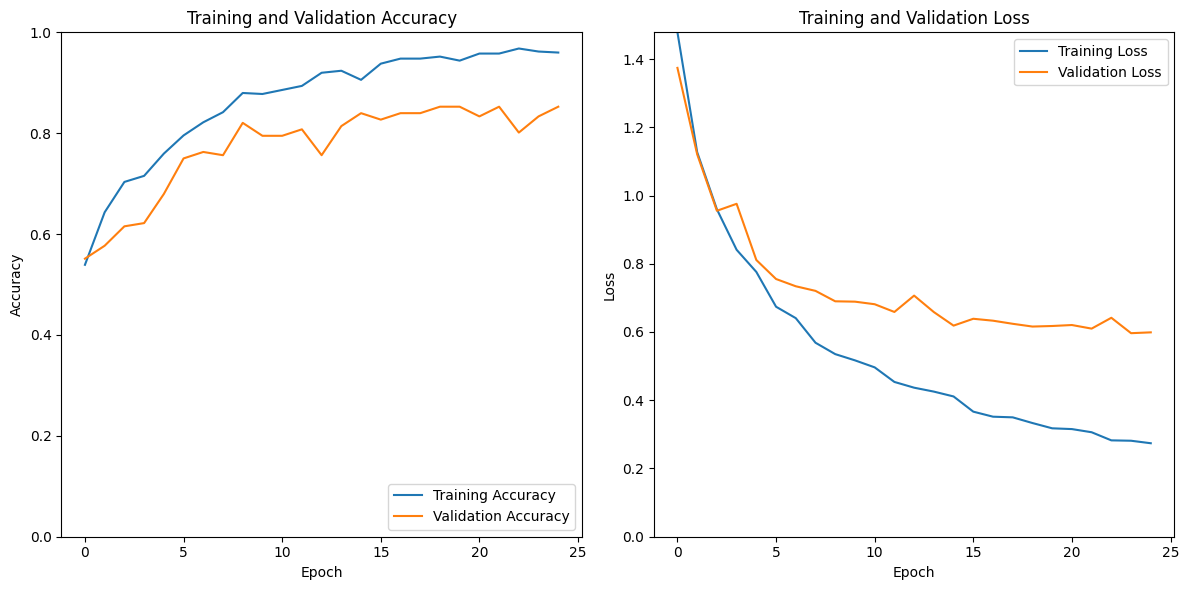

ValueError: Unable to synchronously create dataset (name already exists)

In [9]:
# CS5331/CS4331 You should Impliment this part
# Now, let’s fix the problem with the previous model. Most models in the last task were overfitting (training accuracy got to 100% so quickly, and validation accuracy started to decrease).
# Fix that problem without changing the batch size, number of iterations, or learning rate.
# Any avoiding overfitting can be used. Just keep the parameters in Table 3 the same.

# Here few steps that you could follow

# Import what ever libraries you need
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load some pretrained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)
for layer in base_model.layers:
    layer.trainable = False
    
# Decide on Fine-tuning parameters
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  
model.add(layers.Dropout(0.5))
model.add(layers.Dense(OUTPUT_DIM, activation='softmax')) 
model.compile(optimizer=Adam(learning_rate=LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train/Fit the model
history = model.fit(imgs_train, labels_train, 
                    epochs=NUM_EPOCH, 
                    validation_data=(imgs_val, labels_val), 
                    batch_size=BATCH_SIZE)

# Evaluate Your model
test_loss, test_acc = model.evaluate(imgs_test, labels_test, verbose=2)
print(f"Test accuracy: {test_acc}")

#  Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#  Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(history.history['loss'])])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Display the plots
plt.tight_layout()
plt.show()

# Save model
model.save('pretrained_overfitting_task3.h5')